In [3]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime

# read data

In [4]:
#cleaned media is the output of Media data Preprocess
#media1 is the original predict data after preprocessing
media1 = pd.read_csv("Media Data Analysis/cleaned_media.csv",index_col= 0)

In [5]:
#media2 is the original train data
directory = "Media Data Analysis/train"
media2 = pd.DataFrame()
for file in os.listdir(directory):
    if file.endswith(".csv"):
        media = pd.read_csv(directory+"/"+file, encoding = "latin1")
        media2 = pd.concat([media2,media],ignore_index=True)

/Users/ycr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [6]:
media1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5862 entries, 0 to 5861
Data columns (total 5 columns):
Link      5862 non-null object
Title     5862 non-null object
Source    5862 non-null object
Date      5862 non-null object
Text      5862 non-null object
dtypes: object(5)
memory usage: 274.8+ KB


In [7]:
#drop all the data not relevant to police violence (id=0)
media2 = media2.loc[media2['id'] == 1]

In [8]:
media2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 55 to 755
Data columns (total 7 columns):
Date          229 non-null object
Link          229 non-null object
Source        229 non-null object
Text          229 non-null object
Title         229 non-null object
Unnamed: 0    14 non-null float64
id            229 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 14.3+ KB


In [9]:
media2 = media2.reset_index()
media2 = media2.drop("Unnamed: 0",axis = 'columns')
media2 = media2.drop("index",axis = 'columns')

In [10]:
media2 = media2[['Link','Title','Source','Date','Text']]

# data exploration

**The distribution of source in predict data:**

Text(0.5, 1.0, 'Number of relevant articles in different news media')

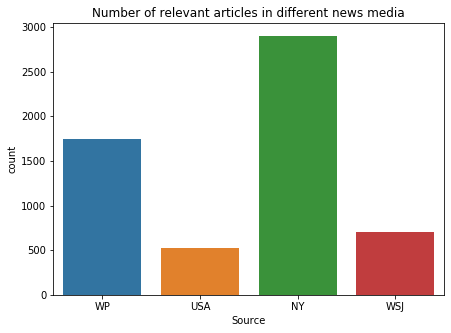

In [11]:
plt.figure(figsize = (7,5) )
sns.countplot(media1.loc[:,'Source'])
plt.title("Number of relevant articles in different news media")

**The distribution of source in train data:**

Text(0.5, 1.0, 'Number of relevant articles in different news media')

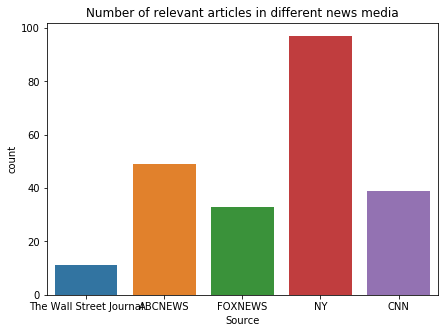

In [12]:
plt.figure(figsize = (7,5) )
sns.countplot(media2.loc[:,'Source'])
plt.title("Number of relevant articles in different news media")

**The distribution of date in predict data:**

In [13]:
media1.loc[:,'Date'] = pd.to_datetime(media1.loc[:,'Date'],format = "%Y-%m-%d")

In [14]:
for i in range(0,media1.shape[0]):
    media1.loc[i,'Year'] = media1.loc[i,'Date'].year

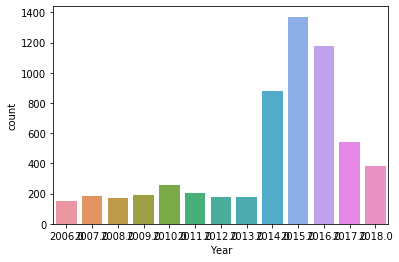

In [15]:
sns.countplot(media1.loc[:,'Year'])

**The distribution of date in train data:**

In [16]:
for i in range(0,media2.shape[0]):
    for fmt in ('%m/%d/%y %H:%M','%d-%b-%y','%Y-%m-%d %H:%M:%S','%d %B %Y'):
        try:
            media2.loc[i,'Date'] = datetime.strptime(media2.loc[i,'Date'], fmt)
        except:
            pass

In [17]:
media2.loc[:,'Date'] = pd.to_datetime(media2.loc[:,'Date'])

In [18]:
for i in range(0,media2.shape[0]):
    media2.loc[i,'Year'] = media2.loc[i,'Date'].year

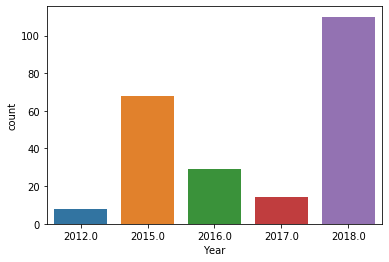

In [19]:
sns.countplot(media2.loc[:,'Year'])

**The distribution of source and data in predict and train data:**

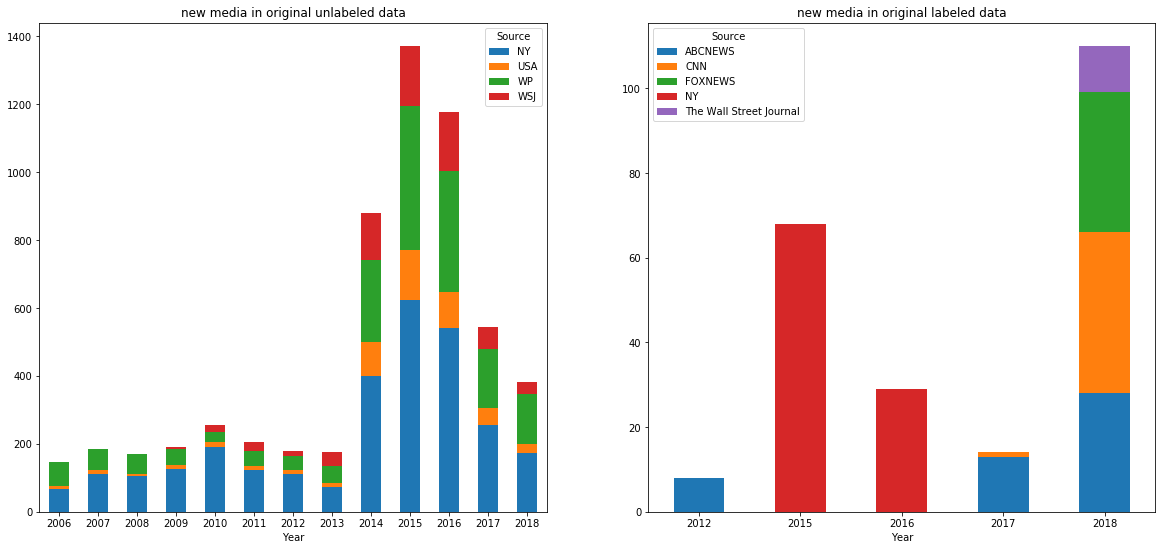

In [20]:
f, axes = plt.subplots(1,2,figsize = (20,9))

data  = media1[['Source','Year','Title']].groupby(['Source','Year']).count()
data = data.reset_index()
data = data.pivot(index = 'Source', columns='Year', values='Title')
data.T.plot(kind = 'bar', stacked = True, ax = axes[0])
xlabels = data.columns.astype(int)
axes[0].set_xticklabels(labels = xlabels, rotation = 0)
#axes[0].set_ylabel('number of articles', rotation = 0)
#axes[0].yaxis.set_label_coords(0,1.05)
axes[0].set_title('new media in original unlabeled data')


data  = media2[['Source','Year','Title']].groupby(['Source','Year']).count()
data = data.reset_index()
data = data.pivot(index = 'Source', columns='Year', values='Title')
data.T.plot(kind = 'bar', stacked = True,ax = axes[1])
xlabels = data.columns.astype(int)
axes[1].set_xticklabels(labels = xlabels, rotation = 0)
axes[1].set_title('new media in original labeled data')

#f.suptitle('number of articles of different news media in different years')
plt.savefig('#news.png')

**Wordcloud of title of all media data:**

In [21]:
media = pd.concat([media1,media2], ignore_index=True)

In [22]:
text = ""
for i in range(0,media.shape[0]):
    text = text+""+ media.loc[i,'Title']

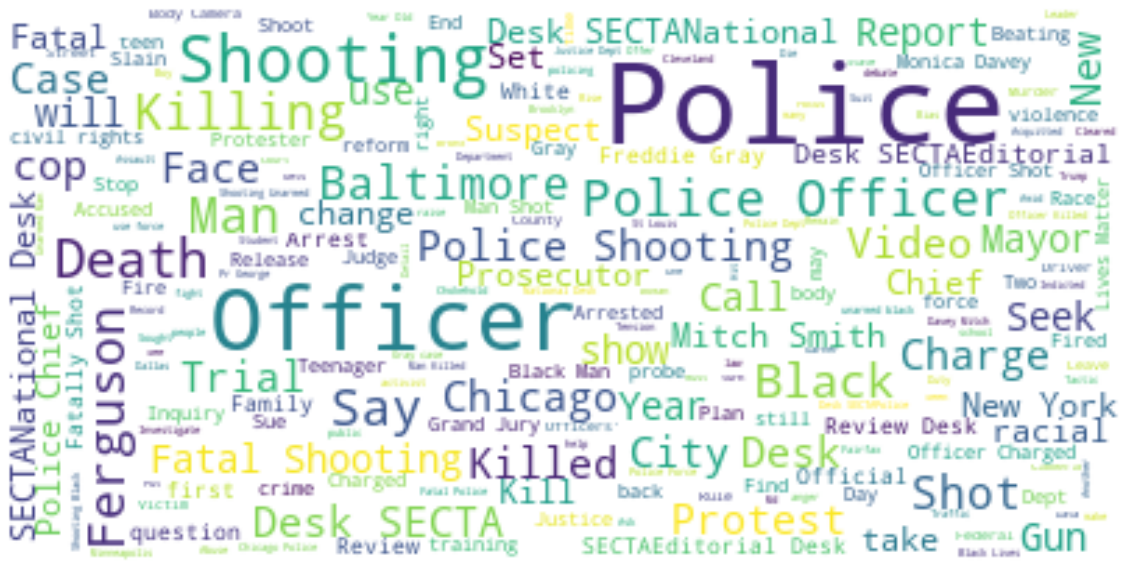

In [23]:
plt.figure(figsize = (20,20))
wordcloud = WordCloud(max_font_size=40,background_color='white').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [24]:
wordcloud.to_file('media_title.png')

**Wordcloud of news content of all media data:**

In [25]:
text = ""
for i in range(0,media.shape[0]):
    text = text+""+ media.loc[i,'Text']

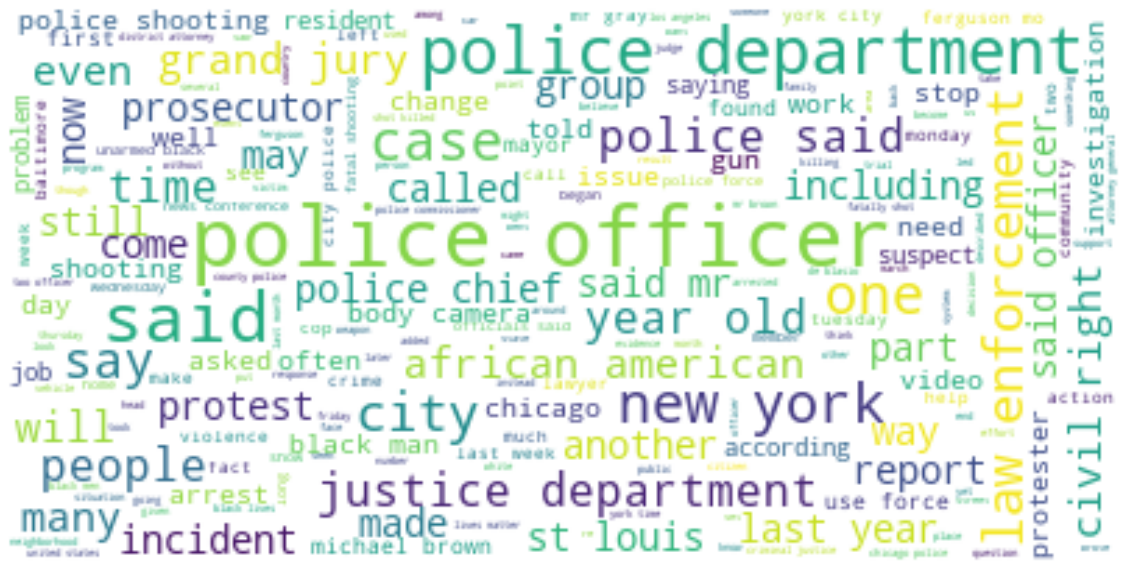

In [26]:
plt.figure(figsize = (20,20))
wordcloud = WordCloud(max_font_size=30,background_color='white').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [27]:
wordcloud.to_file('media_text.png')